In [ ]:
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.datasets import load_iris
from sklearn.metrics import  accuracy_score
from sklearn.metrics import  confusion_matrix
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

In [ ]:
#Loading datasets 
iris_data = load_iris() 
iris=pd.DataFrame(iris_data.data)
iris_targets=pd.DataFrame(iris_data.target)

#priting features name of iris data 
print ("Features Name : ", iris_data.feature_names) 

#priting targets name of iris data 
print ("Targets Name : ", iris_data.target_names) 

#shape of datasets 
print ("Dataset Shape: ", iris.shape) 

#first five sample features
print ("Dataset: ",iris.head())  

#first five sample targets
print ("Dataset: ",iris_targets.head())  

Features Name :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets Name :  ['setosa' 'versicolor' 'virginica']
Dataset Shape:  (150, 4)
Dataset:       0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
Dataset:     0
0  0
1  0
2  0
3  0
4  0


In [ ]:
# features and targets
X = iris_data.data
Y = iris_data.target

In [ ]:
# Splitting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
# Decision tree classifier 
DT = DecisionTreeClassifier(criterion='entropy')

#fitting the training data
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# prediction on random data
X=[[6.4,1.8 ,6.6 ,2.1]]
Y_pred=DT.predict(X)
print(Y_pred)

# prediction on X_test (testing data )
Y_pred=DT.predict(X_test)
print(Y_pred)

[2]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [ ]:
#Accuray of the model 
print("Accuracy:", accuracy_score(y_test, Y_pred))
#confusion matrix
cm=np.array(confusion_matrix(y_test, Y_pred))
cm

Accuracy: 1.0


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

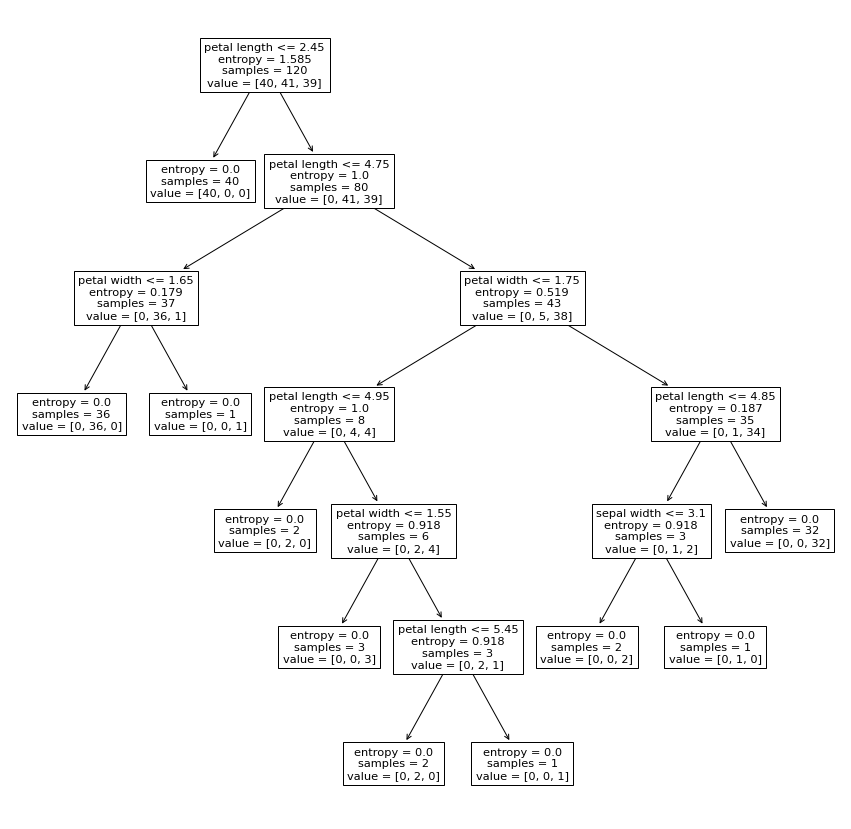

In [ ]:
#plot decision tree
fig, ax = plt.subplots(figsize=(15, 15)) #figsize value changes the size of plot
tree.plot_tree(DT,ax=ax,feature_names=['sepal length','sepal width','petal length','petal width'])
plt.show()

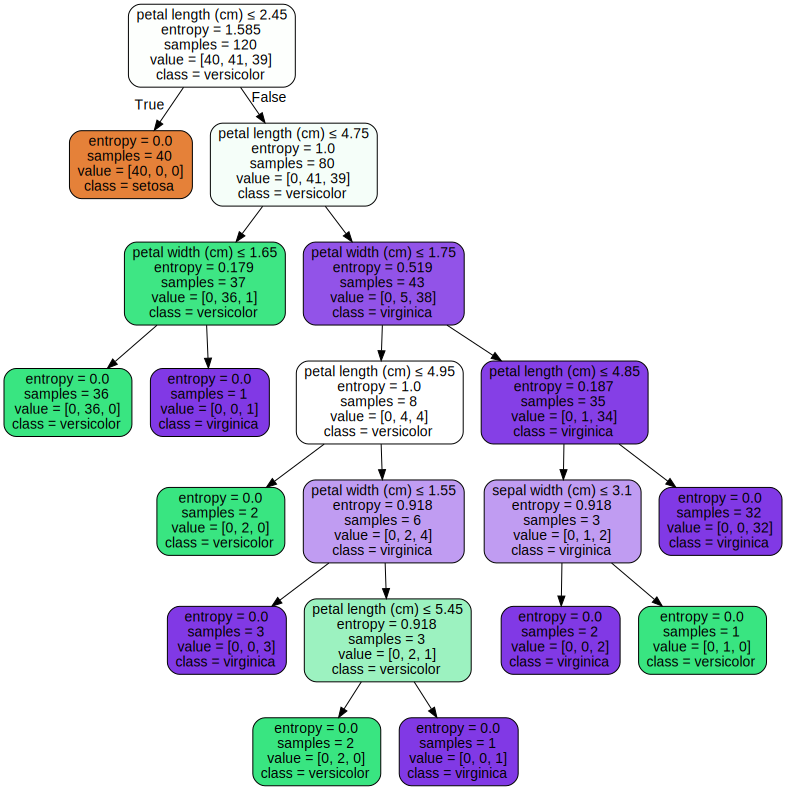

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(DT, out_file=None, 
                      feature_names=iris_data.feature_names,  
                      class_names=iris_data.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = DT.predict(X_test)
#Accuray of the model 
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.3333333333333333
[[10  0  0]
 [ 9  0  0]
 [11  0  0]]


In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(np.mean(pred_i != y_test))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.03333333333333333
0.0
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.06666666666666667
0.03333333333333333
0.03333333333333333


Text(0, 0.5, 'Mean Error')

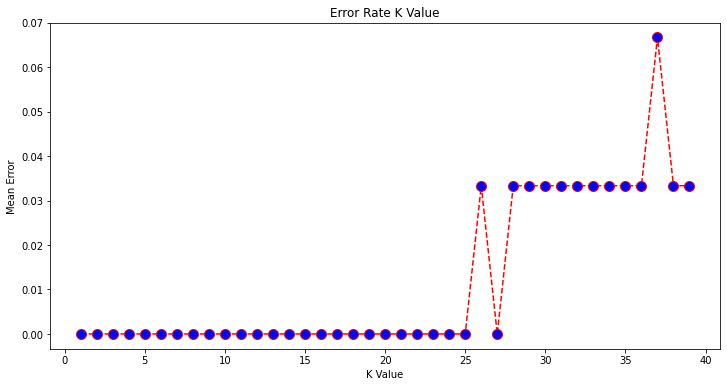

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')